In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# **Import, Analyze and Manipulate Data**

Data manipulation is done on the header and data types. This is to achieve easier reference, standardization and analytical compatibilies.

In [2]:
df = pd.read_csv('tic-tac-toe.data')

In [3]:
df

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [4]:
df.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'result']
df

,B1,B2,B3,B4,B5,B6,B7,B8,B9,result
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [5]:
df['B1'],B1 = pd.factorize(df['B1'], sort=True)
df['B2'],B2 = pd.factorize(df['B2'], sort=True)
df['B3'],B3 = pd.factorize(df['B3'], sort=True)
df['B4'],B4 = pd.factorize(df['B4'], sort=True)
df['B5'],B5 = pd.factorize(df['B5'], sort=True)
df['B6'],B6 = pd.factorize(df['B6'], sort=True)
df['B7'],B7 = pd.factorize(df['B7'], sort=True)
df['B8'],B8 = pd.factorize(df['B8'], sort=True)
df['B9'],B9 = pd.factorize(df['B9'], sort=True)
df['result'],result = pd.factorize(df['result'], sort=True)
[B1, B2, B3, B4, B5, B6, B7, B8, B9, result]

[Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['negative', 'positive'], dtype='object')]

In [6]:
class_names = [result[0], result[1]]
class_names

['negative', 'positive']

In [7]:
df

,B1,B2,B3,B4,B5,B6,B7,B8,B9,result
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


**Splitting the data**

The data is split into 80% training and 20% testing.

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['result'])

print(train.shape)
print(test.shape)

(765, 10)
(192, 10)


In [9]:
feature_names = ['B1','B2','B3','B4', 'B5', 'B6', 'B7', 'B8', 'B9']
x_train = train[feature_names]
x_test = test[feature_names]
y_train = train['result']
y_test = test['result']

In [10]:
print(train['result'].value_counts())
print(test['result'].value_counts())

result
1    500
0    265
Name: count, dtype: int64
result
1    125
0     67
Name: count, dtype: int64


# **Training the model**

In [11]:
model = DecisionTreeClassifier(random_state=42)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

**Analysing predicted values**

In [12]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [13]:
y_train_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

# **Performance statistics of the model**

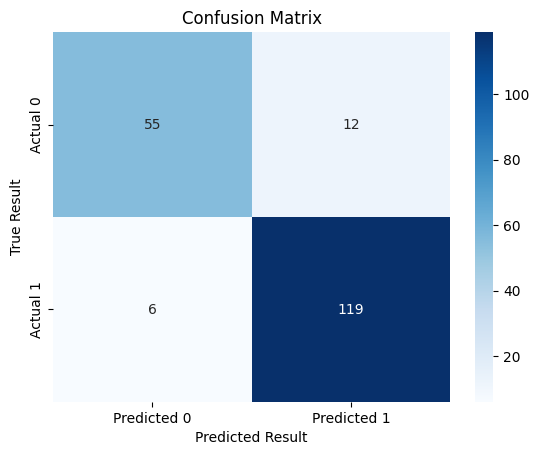

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Use of heatmap to visualize the confusion matrix
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Result')
plt.ylabel('True Result')
plt.title('Confusion Matrix')
plt.show()

In [15]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print(f"Confusion Matrix:")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

from sklearn.metrics import accuracy_score
print(f"\nModel Accuracy:")

# Training data
training_accuracy = accuracy_score(y_train, y_train_pred)*100
print(f"Training accuracy: {training_accuracy}%")
train_error = 100 - training_accuracy
print(f"Probability of training error: {train_error}%")

# Testing data
test_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Testing accuracy: {test_accuracy}%")
test_error = 100 - test_accuracy
print(f"Probability of testing error: {test_error}%")

overallacc = float(TP+TN)/(TP+FP+FN+TN)*100
print(f"Overall accuracy: {overallacc}%")

Confusion Matrix:
True Negative (TN): 55
False Positive (FP): 12
False Negative (FN): 6
True Positive (TP): 119

Model Accuracy:
Training accuracy: 100.0%
Probability of training error: 0.0%
Testing accuracy: 90.625%
Probability of testing error: 9.375%
Overall accuracy: 90.625%


# **Converting the Python model into C**

In [16]:
import emlearn
cmodel = emlearn.convert(model, method='inline')
cmodel.save(file='sonar.h', name='sonar')

'\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode sonar_nodes[110] = {\n  { 4, 1.5, 1, 47 },\n  { 2, 1.5, 2, 28 },\n  { 6, 1.5, 3, 4 },\n  { -1, 0, -1, -1 },\n  { 5, 1.5, 5, 19 },\n  { 1, 1.5, 6, 13 },\n  { 0, 1.5, 7, 10 },\n  { 8, 1.5, 3, 8 },\n  { 7, 1.5, 3, 9 },\n  { -1, 1, -1, -1 },\n  { 3, 1.5, 11, 9 },\n  { 8, 1.5, 3, 12 },\n  { 7, 1.5, 3, 9 },\n  { 8, 1.5, 14, 17 },\n  { 7, 1.5, 15, 3 },\n  { 3, 1.5, 3, 16 },\n  { 0, 1.5, 3, 9 },\n  { 7, 1.5, 18, 9 },\n  { 3, 1.5, 3, 9 },\n  { 1, 0.5, 20, 22 },\n  { 8, 1.5, 21, 9 },\n  { 0, 1.5, 3, 9 },\n  { 0, 1.5, 23, 27 },\n  { 3, 1.5, 24, 3 },\n  { 3, 0.5, 25, 9 },\n  { 0, 0.5, 26, 3 },\n  { 7, 1.5, 3, 9 },\n  { 3, 1.5, 3, 9 },\n  { 0, 1.5, 29, 33 },\n  { 8, 1.5, 3, 30 },\n  { 5, 1.5, 31, 9 },\n  { 6, 1.5, 3, 32 },\n  { 7, 1.5, 3, 9 },\n  { 1, 1.5, 34, 9 },\n  { 7, 0.5, 35, 37 },\n  { 6, 1.5, 9, 36 },\n  { 3, 1.5, 3, 9 },\n  { 1, 0.5, 38, 43 },\n  { 7, 1.5, 39, 3 },\n  { 6, 0.5, 9, 40 